<a href="https://colab.research.google.com/github/mssabahi/Python/blob/master/ch_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_list = [1, 2, 3, 4, 5]

num_list*3

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [3]:
square = np.arange(1,26).reshape(5,5)
size = square.shape[0]
square, square.shape, size

(array([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10],
        [11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20],
        [21, 22, 23, 24, 25]]), (5, 5), 5)

In [4]:
square[3,-3:-5]

array([], dtype=int64)

![](https://drive.google.com/uc?id=1LF92pQhTqSCmET9m8tcHHXcwdG243BC0)

In [6]:
spiral = []

for i in range(0, size):
    # Convert each part marked by any red arrow to a list
    spiral += list(square[i, i:size-i])
    # # Convert each part marked by any green arrow to a list
    spiral += list(square[i+1:size-i, size-i-1])
    # # Convert each part marked by any blue arrow to a list
    spiral += list(reversed(square[size-i-1, i:size-i-1]))
    # # Convert each part marked by any magenta arrow to a list
    spiral += list(reversed(square[i+1:size-i-1, i]))
        
print(spiral)

[1, 2, 3, 4, 5, 10, 15, 20, 25, 24, 23, 22, 21, 16, 11, 6, 7, 8, 9, 14, 19, 18, 17, 12, 13]


In [7]:
list(reversed([1,2,3]))

[3, 2, 1]

#Operations with NumPy arrays

The following blocks of code create new lists given input lists input_list1, input_list2, input_list3 (you can check their values in the console). If you had analogous NumPy arrays with the same values input_array1, input_array2, input_array3 (you can check their values in the console), how would you create similar output as NumPy arrays using the knowledge on broadcasting, accessing element in NumPy arrays, and performing element-wise operations?

In [8]:
input_list1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
list(map(lambda x: [5*i for i in x], input_list1))

[[5, 10, 15], [20, 25, 30], [35, 40, 45]]

In [9]:
np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])*5

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

In [10]:
input_list2 = list(range(0,10))
input_list2
print(list(filter(lambda x: x % 2 == 0, input_list2)))


[0, 2, 4, 6, 8]


In [11]:
output_array2 = np.array(input_list2)[::2]
output_array2

array([0, 2, 4, 6, 8])

In [12]:
input_list3 = [[1, 2], [3, 4], [5, 6]]
print([[i*i for i in j] for j in input_list3])


[[1, 4], [9, 16], [25, 36]]


In [13]:
np.array(input_list3) * np.array(input_list3)

array([[ 1,  4],
       [ 9, 16],
       [25, 36]])

# Simple use of .apply()
Let's get some handful experience with .apply()!

You are given the full scores dataset containing students' performance as well as their background information.

Your task is to define the prevalence() function and apply it to the groups_to_consider columns of the scores DataFrame. This function should retrieve the most prevalent group/category for a given column (e.g. if the most prevalent category in the lunch column is standard, then prevalence() should return standard).

The reduce() function from the functools module is already imported.

Tip: pd.Series is an Iterable object. Therefore, you can use standard operations on it.

In [14]:
import pandas as pd
scores = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/Python_Interview/Chapter_04/exams.csv')
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,associate's degree,free/reduced,none,74,86,82
1,female,group D,some college,free/reduced,none,44,49,53
2,male,group D,some high school,free/reduced,none,54,46,43
3,female,group B,bachelor's degree,standard,none,88,95,92
4,male,group C,master's degree,standard,completed,85,81,81


In [15]:
groups_to_consider = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [16]:
set(scores['race/ethnicity'])
# scores['race/ethnicity'].unique()

{'group A', 'group B', 'group C', 'group D', 'group E'}

In [17]:
scores['race/ethnicity'].value_counts()


group C    34
group B    23
group D    22
group E    12
group A     9
Name: race/ethnicity, dtype: int64

In [18]:
from functools import reduce
def prevalence(series):
    vals = list(series) # each column becomes a list
    # Create a tuple list with unique items and their counts
    # itms = [(x, vals.count(x)) for x in set(series)]

    itms = [(x, vals.count(x)) for x in series.unique()]
    # Extract a tuple with the highest counts using reduce()
    res = reduce(lambda x, y: x if x[1] > y[1] else y, itms)
    # Return the item with the highest counts
    return res[0]

# Apply the prevalence function on the scores DataFrame
result = scores[groups_to_consider].apply(prevalence)
print(result)

gender                               female
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course                none
dtype: object


In [19]:
set(scores[groups_to_consider])

{'gender',
 'lunch',
 'parental level of education',
 'race/ethnicity',
 'test preparation course'}

In [20]:
scores['gender'].value_counts()['female']

52

# Additional arguments
Let's use additional arguments in the .apply() method!

Your task is to create two new columns in scores:

mean is the row-wise mean value of the math score, reading score and writing score
rank defines how high the mean score is:
* 'high' if the mean value > 90
* 'medium' if the mean value > 60  but <=  90
* 'low' if the mean value 

To accomplish this task, you'll need to define the function rank that, given a series, returns a list with two values: the mean of the series and a string defined by the aforementioned rule.

In [21]:
def rank(series):
    # Calculate the mean of the input series
    mean = series.mean()
    # mean = np.mean(series)
    # Return the mean and its rank as a list
    if mean>90:
        return [mean,'high']
    if mean>60 and mean<=90:
        return [mean,'medium']
    return [mean,'low']

# Insert the output of rank() into new columns of scores
cols = ['math score', 'reading score', 'writing score']
scores[['mean', 'rank']] = scores[cols].apply(rank, axis=1, result_type='expand') # expand is used to make the results as a dataframe
print(scores[['mean', 'rank']].head())
scores.head()

        mean    rank
0  80.666667  medium
1  48.666667     low
2  47.666667     low
3  91.666667    high
4  82.333333  medium


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean,rank
0,female,group E,associate's degree,free/reduced,none,74,86,82,80.666667,medium
1,female,group D,some college,free/reduced,none,44,49,53,48.666667,low
2,male,group D,some high school,free/reduced,none,54,46,43,47.666667,low
3,female,group B,bachelor's degree,standard,none,88,95,92,91.666667,high
4,male,group C,master's degree,standard,completed,85,81,81,82.333333,medium


In [22]:
(74+86+82)/3
# axis=1

80.66666666666667

# Functions with additional arguments
Let's add some arguments to the function definition!

Numeric data in scores represent students' performance scaled between 0 and 100. Your task is to rescale this data to an arbitrary range between low and high. Rescaling should be done in a linear fashion, i.e. for any data point  in a column:

 

```
Xnew = X(high-low)/100 + low

```


 

To do rescaling, you'll have to define the function rescale(). Remember, the operation written above can be applied to Series directly. After defining the function, you'll have to apply it to the specified columns of scores.

In [23]:
scores = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/Python_Interview/Chapter_04/exams.csv')
# Define the expression to rescale input series.
# Rescale the data in cols to lie between 1 and 10.
def rescale(series, low, high):
   # Define the expression to rescale input series
   return series*(high-low)/100 + low

# Rescale the data in cols to lie between 1 and 10
cols = ['math score', 'reading score', 'writing score'] 
scores[cols] = scores[cols].apply(rescale, args=[1,10], axis=1) # axis=0: on columns
print(scores[cols].head())

   math score  reading score  writing score
0        7.66           8.74           8.38
1        4.96           5.41           5.77
2        5.86           5.14           4.87
3        8.92           9.55           9.28
4        8.65           8.29           8.29


In [24]:
scores = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/Python_Interview/Chapter_04/exams.csv')
# Define the expression to rescale input series.
# Rescale the data in cols to lie between 1 and 10.
def rescale(series, low, high):
   # Define the expression to rescale input series
   return series*(high-low)/100 + low

# Rescale the data in cols to lie between 1 and 10
cols = ['math score', 'reading score', 'writing score'] 
scores[cols] = scores[cols].apply(rescale, args=[1,10], axis=0) # axis=1: on rows; doesnt matter in this case
print(scores[cols].head())

   math score  reading score  writing score
0        7.66           8.74           8.38
1        4.96           5.41           5.77
2        5.86           5.14           4.87
3        8.92           9.55           9.28
4        8.65           8.29           8.29


# Standard DataFrame methods
You are given the diabetes dataset storing information on female patients tested for diabetes. You will focus on blood glucose levels and the test results. Subjects, tested positively, usually have higher blood glucose levels after performing the so-called glucose tolerance test. Your task is to investigate whether it is true for this specific dataset.

The plasma glucose column corresponds to the glucose levels. The test result column corresponds to the diabetes test results.

You must use standard DataFrame methods (the numpy module is not imported for you).

In [25]:
diabetes = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/Python_Interview/Chapter_04/diabetes.csv')
print(diabetes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   n pregnant         768 non-null    int64  
 1   plasma glucose     763 non-null    float64
 2   blood pressure     733 non-null    float64
 3   skin thickness     541 non-null    float64
 4   serum insulin      394 non-null    float64
 5   bmi                757 non-null    float64
 6   pedigree function  768 non-null    float64
 7   age                768 non-null    int64  
 8   test result        768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB
None


In [26]:
diabetes.head()

,n pregnant,plasma glucose,blood pressure,skin thickness,serum insulin,bmi,pedigree function,age,test result
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,positive
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,negative
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,positive
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,negative
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,positive


In [27]:
# Calculate the mean glucose level in the entire dataset
print(diabetes['plasma glucose'].mean())

# Group the data according to the diabetes test results
diabetes_grouped = diabetes.groupby(['test result'])

# Calculate the mean glucose levels per group
print(diabetes_grouped['plasma glucose'].mean())

121.6867627785059
test result
negative    110.643863
positive    142.319549
Name: plasma glucose, dtype: float64


In [28]:
heroes = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/Python_Interview/Chapter_04/heroes_information.csv')
heroes['bmi'] = heroes['Weight']/( (heroes['Height']/100)**2 )
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,bmi
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,107.015458
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,17.817494
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,26.296567
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,107.015458
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,-101.010101


In [29]:
heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
 11  bmi         732 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 68.9+ KB


# BMI of villains
Let's return to the heroes dataset containing the information on different comic book heroes. We added a bmi column to the dataset calculated as Weight divided by (Height/100)**2. This index helps define whether an individual has weight problems.

Your task is to find out what is the mean value and standard deviation of the BMI index depending on the character's 'Alignment' and the 'Publisher' whom this character belongs to. However, you'll need to consider only those groups that have more than 10 valid observations of the BMI index.

In [30]:
import numpy as np

# Group the data by two factors specified in the context
groups = heroes.groupby(['Publisher', 'Alignment'])

# Filter groups having more than 10 valid bmi observations
fheroes = groups.filter(lambda x: x['bmi'].count() > 10)

# Group the filtered data again by the same factors
fgroups = fheroes.groupby(['Publisher', 'Alignment'])

# Calculate the mean and standard deviation of the BMI index
result = fgroups['bmi'].agg([np.mean, np.std])
print(result)

                                   mean         std
Publisher         Alignment                        
DC Comics         bad         13.121538  223.552122
                  good       -15.353158   59.322142
                  neutral    -17.856179   69.314656
Dark Horse Comics good       -17.905567   61.631452
Image Comics      bad       -101.010101    0.000000
Marvel Comics     bad         23.576160  260.314675
                  good         7.493435   50.359506
                  neutral     24.076486   73.907059
NBC - Heroes      good      -101.010101    0.000000


# NaN value imputation
Let's try to impute some values, using the .transform() method. In the previous task you created a DataFrame fheroes where all the groups with insufficient amount of bmi observations were removed. Our bmi column has a lot of missing values (NaNs) though. Given two copies of the fheroes DataFrame (imp_globmean and imp_grpmean), your task is to impute the NaNs in the bmi column with the overall mean value and with the mean value per group defined by Publisher and Alignment factors, respectively.

Tip: pandas Series and NumPy arrays have a special .fillna() method which substitutes all the encountered NaNs with a value specified as an argument.

In [31]:
# # Define a lambda function that imputes NaN values in series
# impute = lambda series: series.fillna(np.mean(series))

# # Impute NaNs in the bmi column of imp_globmean
# imp_globmean['bmi'] = imp_globmean['bmi'].transform(impute)
# print("Global mean = " + str(fheroes['bmi'].mean()) + "\n")

# groups = imp_grpmean.groupby(['Publisher', 'Alignment'])

# # Impute NaNs in the bmi column of imp_grpmean
# imp_grpmean['bmi'] = groups['bmi'].transform(impute)
# print(groups['bmi'].mean())

In [32]:
retinol = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data_Camp/Python_Interview/Chapter_04/retinol.csv')
retinol.head()

,age,gender,smoking,bmi,vitamin use,calories,fat,fiber,alcohol,cholesterol,diet B-carotene,diet retinol,plasma B-carotene,plasma retinol
0,64,Female,Former,21.48380,Yes_fairly_often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Yes_fairly_often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Yes_not_often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Yes_fairly_often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


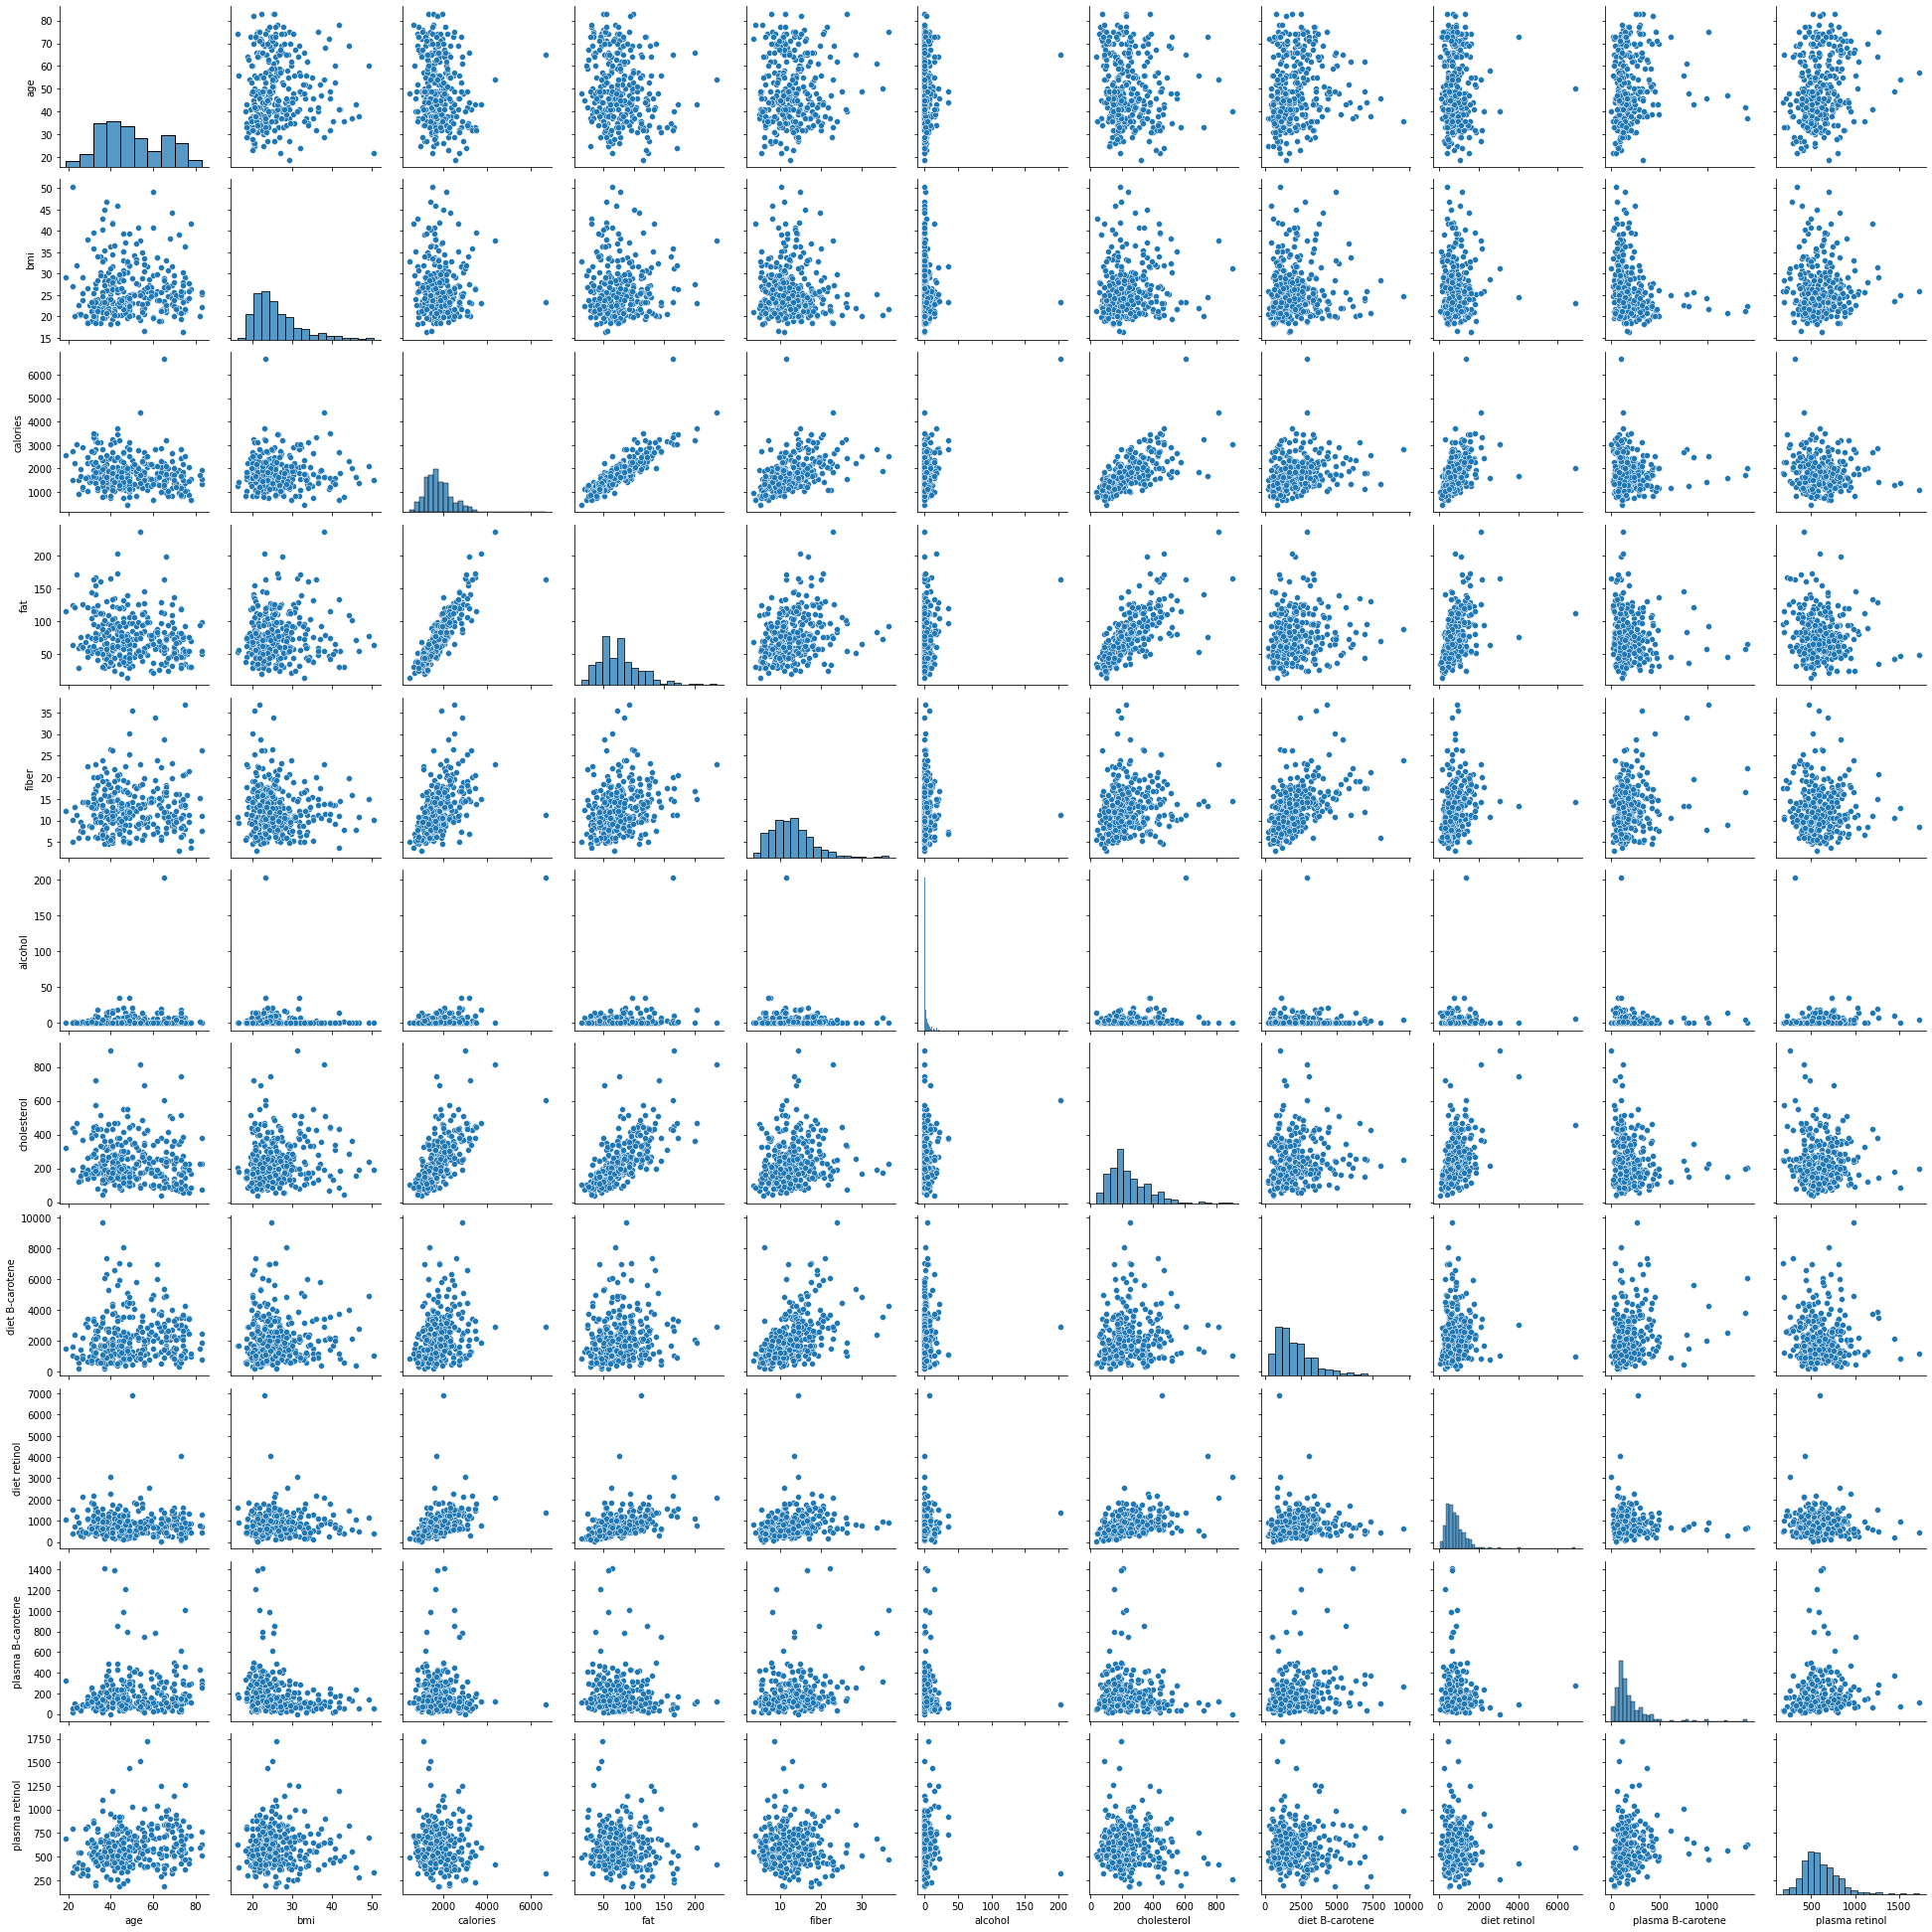

In [33]:
numeric_cols = retinol.select_dtypes(include=[np.number])

sns.pairplot(numeric_cols)

In [34]:
retinol.corr()

,age,bmi,calories,fat,fiber,alcohol,cholesterol,diet B-carotene,diet retinol,plasma B-carotene,plasma retinol
age,1.000000,-0.017464,-0.176769,-0.169480,0.044852,0.051583,-0.113606,0.071869,-0.009611,0.101128,0.211672
bmi,-0.017464,1.000000,0.003527,0.048750,-0.087623,-0.072695,0.110257,-0.006603,0.032056,-0.229387,0.013139
calories,-0.176769,0.003527,1.000000,0.871842,0.465481,0.451470,0.659175,0.243377,0.402492,-0.022207,-0.073329
fat,-0.169480,0.048750,0.871842,1.000000,0.276484,0.185743,0.709848,0.143428,0.412215,-0.091647,-0.090938
fiber,0.044852,-0.087623,0.465481,0.276484,1.000000,-0.020117,0.153968,0.482644,0.214612,0.235954,-0.044431
alcohol,0.051583,-0.072695,0.451470,0.185743,-0.020117,1.000000,0.182264,0.039426,0.044947,-0.022211,0.017136
cholesterol,-0.113606,0.110257,0.659175,0.709848,0.153968,0.182264,1.000000,0.115635,0.443439,-0.130305,-0.070201
diet B-carotene,0.071869,-0.006603,0.243377,0.143428,0.482644,0.039426,0.115635,1.000000,0.052867,0.224780,-0.013539
diet retinol,-0.009611,0.032056,0.402492,0.412215,0.214612,0.044947,0.443439,0.052867,1.000000,-0.046135,-0.062802
plasma B-carotene,0.101128,-0.229387,-0.022207,-0.091647,0.235954,-0.022211,-0.130305,0.224780,-0.046135,1.000000,0.071577


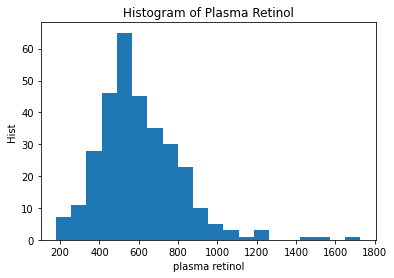

In [35]:
plt.hist(retinol['plasma retinol'], bins=20)
plt.title('Histogram of Plasma Retinol')

# Add other missing parts to the plot
plt.xlabel('plasma retinol')
plt.ylabel('Hist')

plt.show()

#Creating boxplots
Let's get back to our heroes dataset. As we previously discovered, the BMI index is in average much higher for villains than for good characters (taking into account only Marvel and DC publishers). Your task is to plot the corresponding distributions of BMI indices using boxplots.

Tip: to select rows in a DataFrame, for which a specific column follows a certain condition, use this expression dataframe[condition for column_name] (e.g. heroes[heroes['Alignment'] == 'good'] selects rows that have a 'good' Alignment in the heroes dataset).

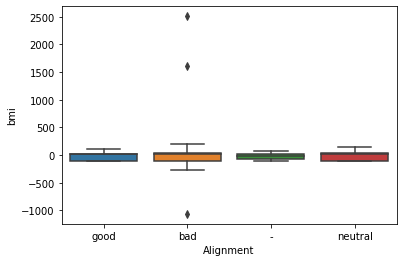

In [36]:
import seaborn as sns

# Create a boxplot of BMI indices for 'good' and 'bad' sides
sns.boxplot(x='Alignment', y='bmi', data=heroes)
plt.show()

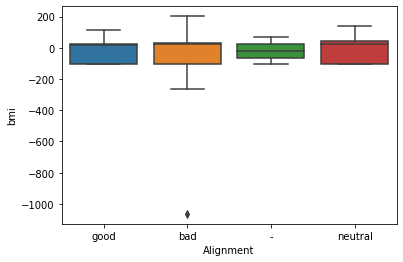

In [37]:
import seaborn as sns

# Select rows from 'heroes' for which the BMI index < 1000
heroes_filtered = heroes[heroes['bmi'] < 1000]

# Create a new boxplot of BMI indices
sns.boxplot(x='Alignment', y='bmi', data=heroes_filtered)
plt.show()